**使用逻辑回归对西瓜数据集分类**

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
# load the CSV file as a numpy matrix
dataset = np.loadtxt('watermelon.txt', delimiter=",")

In [2]:
# separate the data from the target attributes
X = dataset[:,1:3]
y = dataset[:,3]

In [3]:
m,n = np.shape(X)  

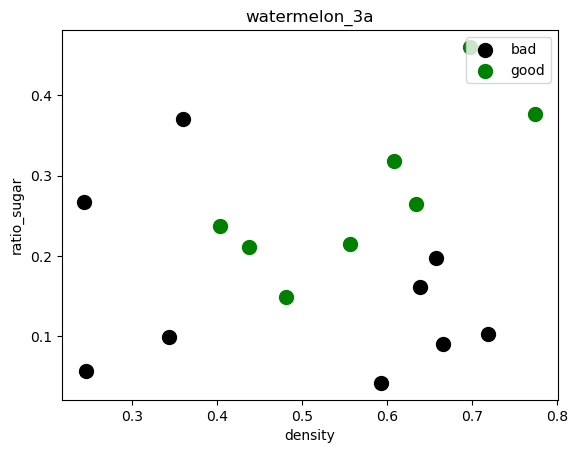

In [4]:
# draw scatter diagram to show the raw data
f1 = plt.figure(1)       
plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=100, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
plt.legend(loc = 'upper right')  

In [5]:
''' 
using sklearn lib for logistic regression
'''
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import matplotlib.pylab as pl

In [6]:
# generalization of test and train set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=0)

In [7]:
# model training
log_model = LogisticRegression()  # using log-regression lib model
log_model.fit(X_train, y_train)  # fitting

LogisticRegression()

In [8]:
# model validation
y_pred = log_model.predict(X_test)

In [9]:
# summarize the fit of the model
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[3 2]
 [1 3]]
              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67         5
         1.0       0.60      0.75      0.67         4

    accuracy                           0.67         9
   macro avg       0.68      0.68      0.67         9
weighted avg       0.68      0.67      0.67         9



In [10]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)    

In [11]:
# show decision boundary in plt
# X - some data in 2dimensional np.array
f2 = plt.figure(2) 
h = 0.001
x0_min, x0_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
x1_min, x1_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
x0, x1 = np.meshgrid(np.arange(x0_min, x0_max, h),np.arange(x1_min, x1_max, h))

<Figure size 640x480 with 0 Axes>

In [12]:
# here "model" is your model's prediction (classification) function
z = log_model.predict(np.c_[x0.ravel(), x1.ravel()]) 

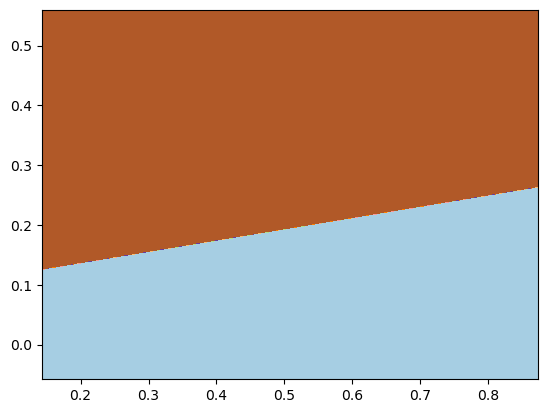

In [13]:
# Put the result into a color plot
z = z.reshape(x0.shape)
plt.contourf(x0, x1, z, cmap = pl.cm.Paired )

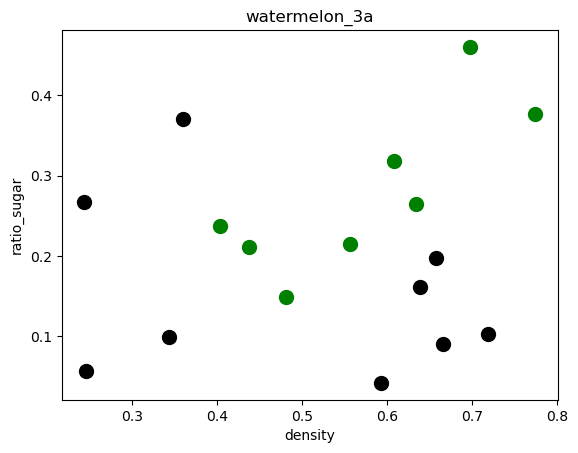

In [14]:
# Plot also the training pointsplt.title('watermelon_3a')  
plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=100, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
# plt.show()

In [15]:
'''
coding to implement logistic regression
'''
from sklearn import model_selection
# X_train, X_test, y_train, y_test
np.ones(n)
m,n = np.shape(X)
X_ex = np.c_[X, np.ones(m)]  # extend the variable matrix to [x, 1]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_ex, y, test_size=0.5, random_state=0)

In [16]:
m_test = np.shape(X_test)[0]
# calculation of confusion_matrix and prediction accuracy
cfmat = np.zeros((2,2))
for i in range(m_test):   
    if y_pred[i] == y_test[i] == 0: cfmat[0,0] += 1 
    elif y_pred[i] == y_test[i] == 1: cfmat[1,1] += 1 
    elif y_pred[i] == 0: cfmat[1,0] += 1 
    elif y_pred[i] == 1: cfmat[0,1] += 1 
                                
print(cfmat)

[[3. 2.]
 [1. 3.]]


**线性回归模型**

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [19]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [20]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [21]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [22]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [23]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [24]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [25]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


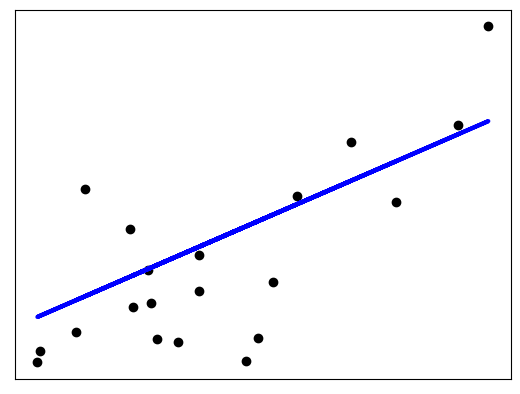

In [26]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

**决策树例子**

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [28]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

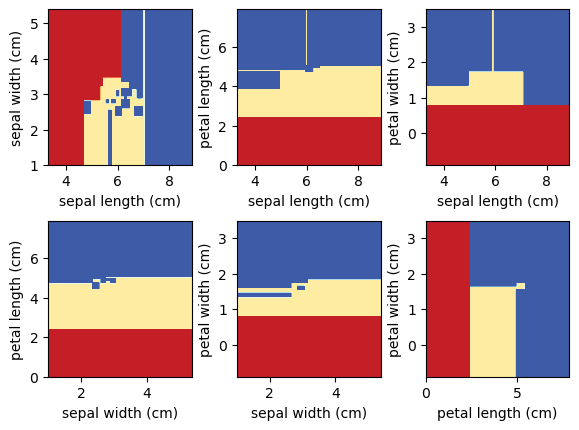

In [29]:
# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

(0.705, 7.195, -0.01999999999999999, 2.62)

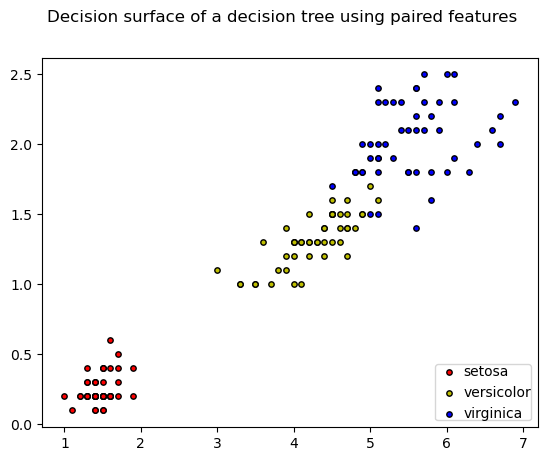

In [30]:
# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

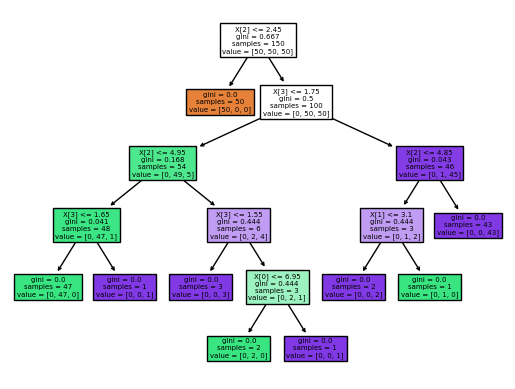

In [31]:
plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

**决策树回归**

In [32]:
import numpy as np
rng = np.random.RandomState(42)
X = np.sort(5 * rng.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y[::2] += 0.5 * (0.5 - rng.rand(50))
from sklearn import tree
regr1 = tree.DecisionTreeRegressor(max_depth=2, random_state=42)
regr1.fit(X, y)
regr2 = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
regr2.fit(X, y)
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

In [33]:
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

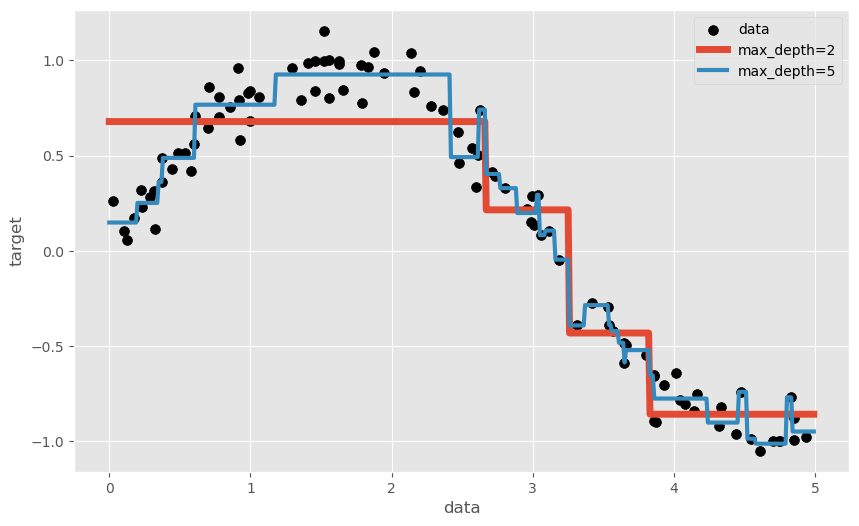

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='k', s=50, label='data')
plt.plot(X_test, y_1, label="max_depth=2", linewidth=5)
plt.plot(X_test, y_2, label="max_depth=5", linewidth=3)
plt.xlabel("data")
plt.ylabel("target")
plt.legend()

**感知机手写体分类**

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn import datasets

In [37]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
clf = MLPClassifier(random_state=1)

In [38]:
clf.fit(X_train, y_train)
print('准确率：%s' % clf.score(X_test, y_test))
print('交叉验证准确率：%s' % cross_val_score(clf, X, y, cv = 10).mean())

准确率：0.9655172413793104
交叉验证准确率：0.9460180012414648


**SVM分类**

In [39]:
# data loading and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [41]:
df = np.loadtxt('watermelon.txt', delimiter=",")
df = pd.DataFrame(df)
df.columns = ['id', 'density', 'sugar_content', 'label']
df.set_index(['id'])

,density,sugar_content,label
id,,,
1.0,0.697,0.460,1.0
2.0,0.774,0.376,1.0
3.0,0.634,0.264,1.0
4.0,0.608,0.318,1.0
5.0,0.556,0.215,1.0
6.0,0.403,0.237,1.0
7.0,0.481,0.149,1.0
8.0,0.437,0.211,1.0
9.0,0.666,0.091,0.0


In [42]:
X = df[['density', 'sugar_content']].values
y = df['label'].values

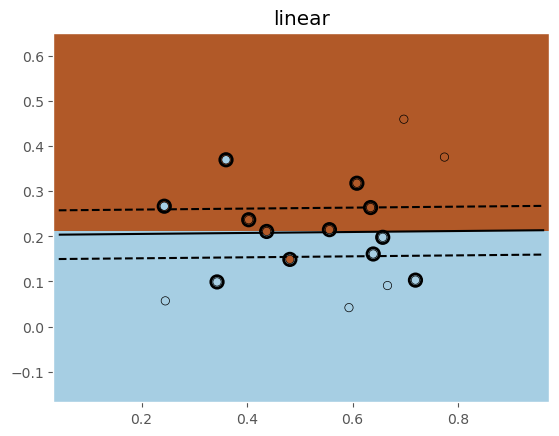

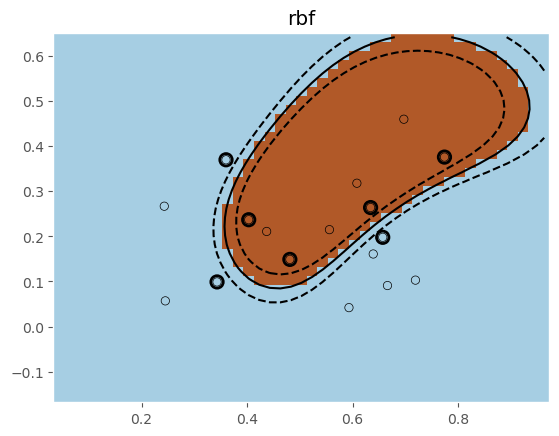

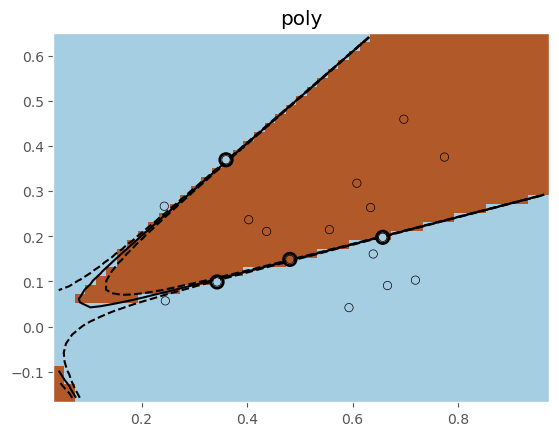

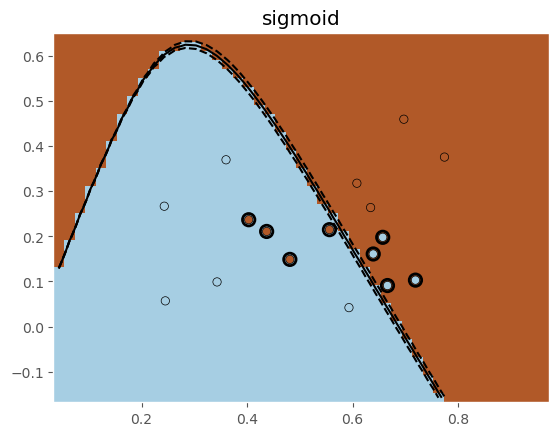

In [43]:
# SVM training and comparison
# based on linear kernel as well as gaussian kernel
from sklearn import svm 

for fig_num, kernel in enumerate(('linear', 'rbf', 'poly', 'sigmoid')): 
    # initial
    svc = svm.SVC(C=1000, kernel=kernel)  # classifier 1 based on linear kernel
    # train
    svc.fit(X, y)
    # get support vectors
    sv = svc.support_vectors_
    # draw decision zone
    plt.figure(fig_num)
    plt.clf()
    
    # plot point and mark out support vectors
    plt.scatter( X[:,0],  X[:,1], edgecolors='k', c=y, cmap=plt.cm.Paired,  zorder=10)
    plt.scatter(sv[:,0], sv[:,1], edgecolors='k', facecolors='none', s=80, linewidths=2, zorder=10)
    
    # plot the decision boundary and decision zone into a color plot
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = svc.decision_function(np.c_[XX.ravel(), YY.ravel()]) 
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z>0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    
    plt.title(kernel)
    plt.axis('tight')
plt.show()

**SVR回归**

In [44]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [45]:
X = np.sort(5 * np.random.rand(40,1), axis = 0)
y = np.sin(X).ravel()

y[::5] += 3 * (0.5 - np.random.rand(8))

In [46]:
svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
svr_line = SVR(kernel = 'linear', C = 1e3)
svr_poly = SVR(kernel = 'poly', C = 1e3, degree = 2)

In [47]:
y_rbf = svr_rbf.fit(X, y).predict(X)
y_line = svr_line.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

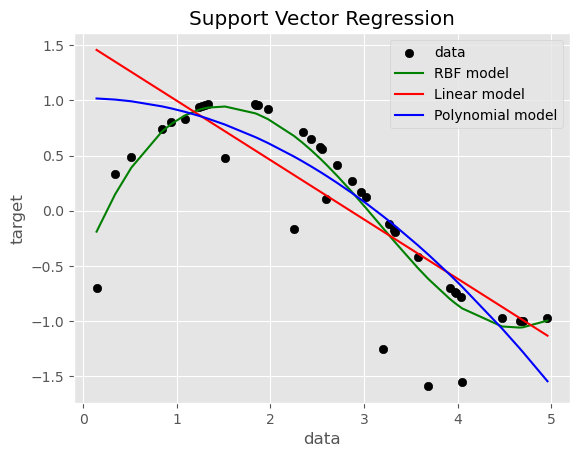

In [48]:
plt.scatter(X, y, c = 'k', label = 'data')
plt.plot(X, y_rbf, c = 'g', label = 'RBF model')
plt.plot(X, y_line, c = 'r', label = 'Linear model')
plt.plot(X, y_poly, c = 'b', label = 'Polynomial model')

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

**AdaBoost回归**

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [50]:
# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

In [51]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300,
                  random_state=RandomState(MT19937) at 0x1CD7F1D1640)

In [52]:
# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

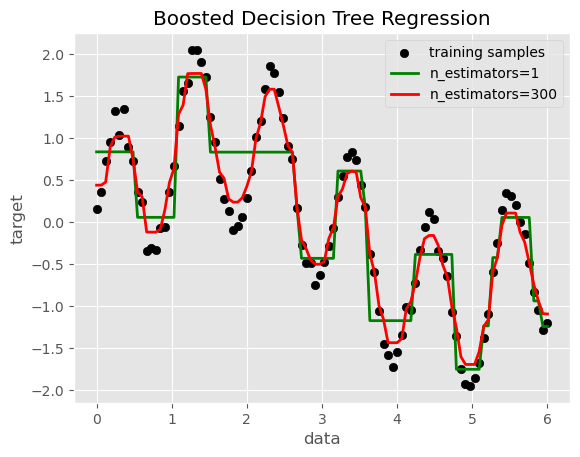

In [53]:
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()